In [1]:
##CLASSIFICATION model whether or not a consumer has a high income
#import the pandas library

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as sklm
import seaborn as sns
import warnings
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier




In [2]:
#load the CSV file into a pandas dataframe
df = pd.read_csv('Project 01 - Data.csv', index_col='id')

df.head()

,age,employer_type,highest_education_completed,marital_status,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,high_income
id,,,,,,,,,,,,
1,27,non_government,bachelors_degree,married,0,3,1,0,0,40,20,0.0
2,44,government_local,high_school,divorced,2,3,0,0,0,40,20,0.0
3,35,non_government,high_school,married,10,3,1,0,0,40,20,0.0
4,19,government_federal,some_college,never_married,4,3,1,0,0,20,5,0.0
5,42,non_government,high_school,married,8,3,1,0,0,30,20,0.0


In [3]:
#Data preparation
#perform your data cleaning/feature engineering/preprocessing tasks here
df.describe()


,age,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,high_income
count,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,20000.000000
mean,37.751391,4.008000,2.806652,0.642652,1629.516435,253.363348,41.260478,19.765913,0.192850
std,12.573718,3.243046,0.530113,0.479229,7335.194075,1186.247358,11.287738,2.735127,0.394546
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,28.000000,1.000000,3.000000,0.000000,0.000000,0.000000,40.000000,20.000000,0.000000
50%,36.000000,3.000000,3.000000,1.000000,0.000000,0.000000,40.000000,20.000000,0.000000
75%,46.000000,7.000000,3.000000,1.000000,0.000000,0.000000,45.000000,20.000000,0.000000
max,90.000000,12.000000,3.000000,1.000000,117857.000000,12980.000000,99.000000,38.000000,1.000000


In [4]:
# check for duplicates
#print(df.duplicated())

# check for NAs
#print(df.isna().sum())

# drop rows with NAs
#df = df.dropna()

# check for missing values
#print(df.isnull().values.any())
print(df.isnull())

         age  employer_type  highest_education_completed  marital_status  \
id                                                                         
1      False          False                        False           False   
2      False          False                        False           False   
3      False          False                        False           False   
4      False          False                        False           False   
5      False          False                        False           False   
...      ...            ...                          ...             ...   
22996  False          False                        False           False   
22997  False          False                        False           False   
22998  False          False                        False           False   
22999  False          False                        False           False   
23000  False          False                        False           False   

       occu

In [5]:
# loop through each column and print unique values
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column {col}: {unique_values}")

Unique values in column age: [27 44 35 19 42 32 45 29 36 49 51 41 52 40 22 21 83 31 37 43 61 18 24 57
 46 33 28 30 38 50 69 39 23 25 34 60 59 54 63 55 26 58 20 47 48 66 64 70
 56 65 77 53 68 67 62 75 71 73 90 84 74 78 72 76 80 82 85 81 88 79 86]
Unique values in column employer_type: ['non_government' 'government_local' 'government_federal'
 'government_state' 'self_employed_incorporated'
 'self_employed_not_incorporated']
Unique values in column highest_education_completed: ['bachelors_degree' 'high_school' 'some_college' 'masters_degree'
 'associates_degree_vocational' 'associates_degree_academic'
 'professional_degree' 'doctoral_degree']
Unique values in column marital_status: ['married' 'divorced' 'never_married' 'widowed' 'separated']
Unique values in column occupation_code: [ 0  2 10  4  8  7  1  5  3  9 11  6 12]
Unique values in column race_code: [3 2 0 1]
Unique values in column gender: [1 0]
Unique values in column capital_gains: [    0 43232 15107 ... 20440 20160  9035]
Uniq

In [6]:
#Convert categorical columns to numeric : DUMMY CODING
# perform one-hot encoding on each categorical column
employer_type_dummy = pd.get_dummies(df['employer_type'], prefix='employer_type')
education_dummy = pd.get_dummies(df['highest_education_completed'], prefix='education')
marital_status_dummy = pd.get_dummies(df['marital_status'], prefix='marital_status')

# combine the one-hot encoded columns with the original dataframe
df = pd.concat([df, employer_type_dummy, education_dummy, marital_status_dummy], axis=1)

# drop the original categorical columns
df = df.drop(['employer_type', 'highest_education_completed', 'marital_status'], axis=1)

# print the updated dataframe
df.head()


,age,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,high_income,employer_type_government_federal,...,education_doctoral_degree,education_high_school,education_masters_degree,education_professional_degree,education_some_college,marital_status_divorced,marital_status_married,marital_status_never_married,marital_status_separated,marital_status_widowed
id,,,,,,,,,,,,,,,,,,,,,
1,27,0,3,1,0,0,40,20,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2,44,2,3,0,0,0,40,20,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,35,10,3,1,0,0,40,20,0.0,0,...,0,1,0,0,0,0,1,0,0,0
4,19,4,3,1,0,0,20,5,0.0,1,...,0,0,0,0,1,0,0,1,0,0
5,42,8,3,1,0,0,30,20,0.0,0,...,0,1,0,0,0,0,1,0,0,0


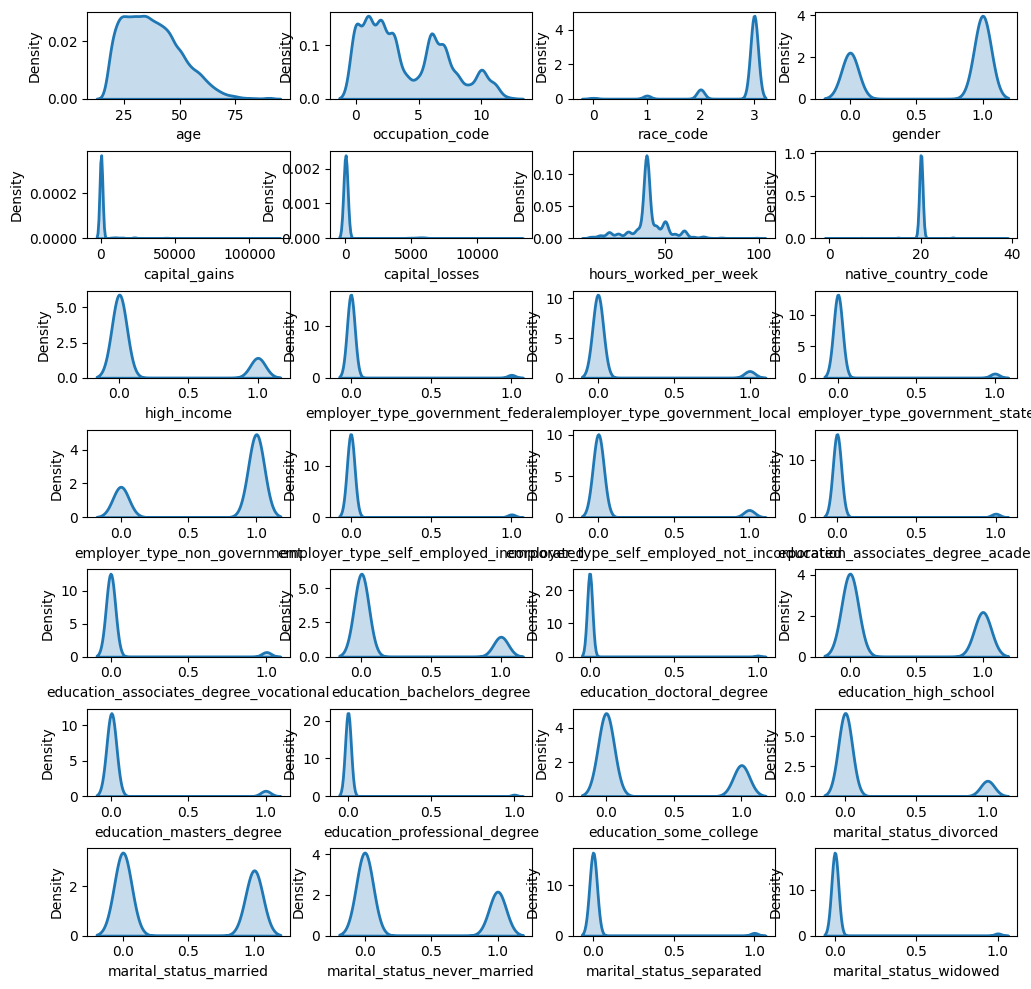

In [7]:
#generate kernel density estimate (KDE) plots for all nine variables in the dataset
rows, cols = 7, 4
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(12, 12), gridspec_kw={'hspace': 0.6})
for row in range(rows):
  for col in range(cols):
    sns.kdeplot(df[df.columns[df_col_index]], ax=ax[row, col], fill=True, lw=2)
    df_col_index += 1

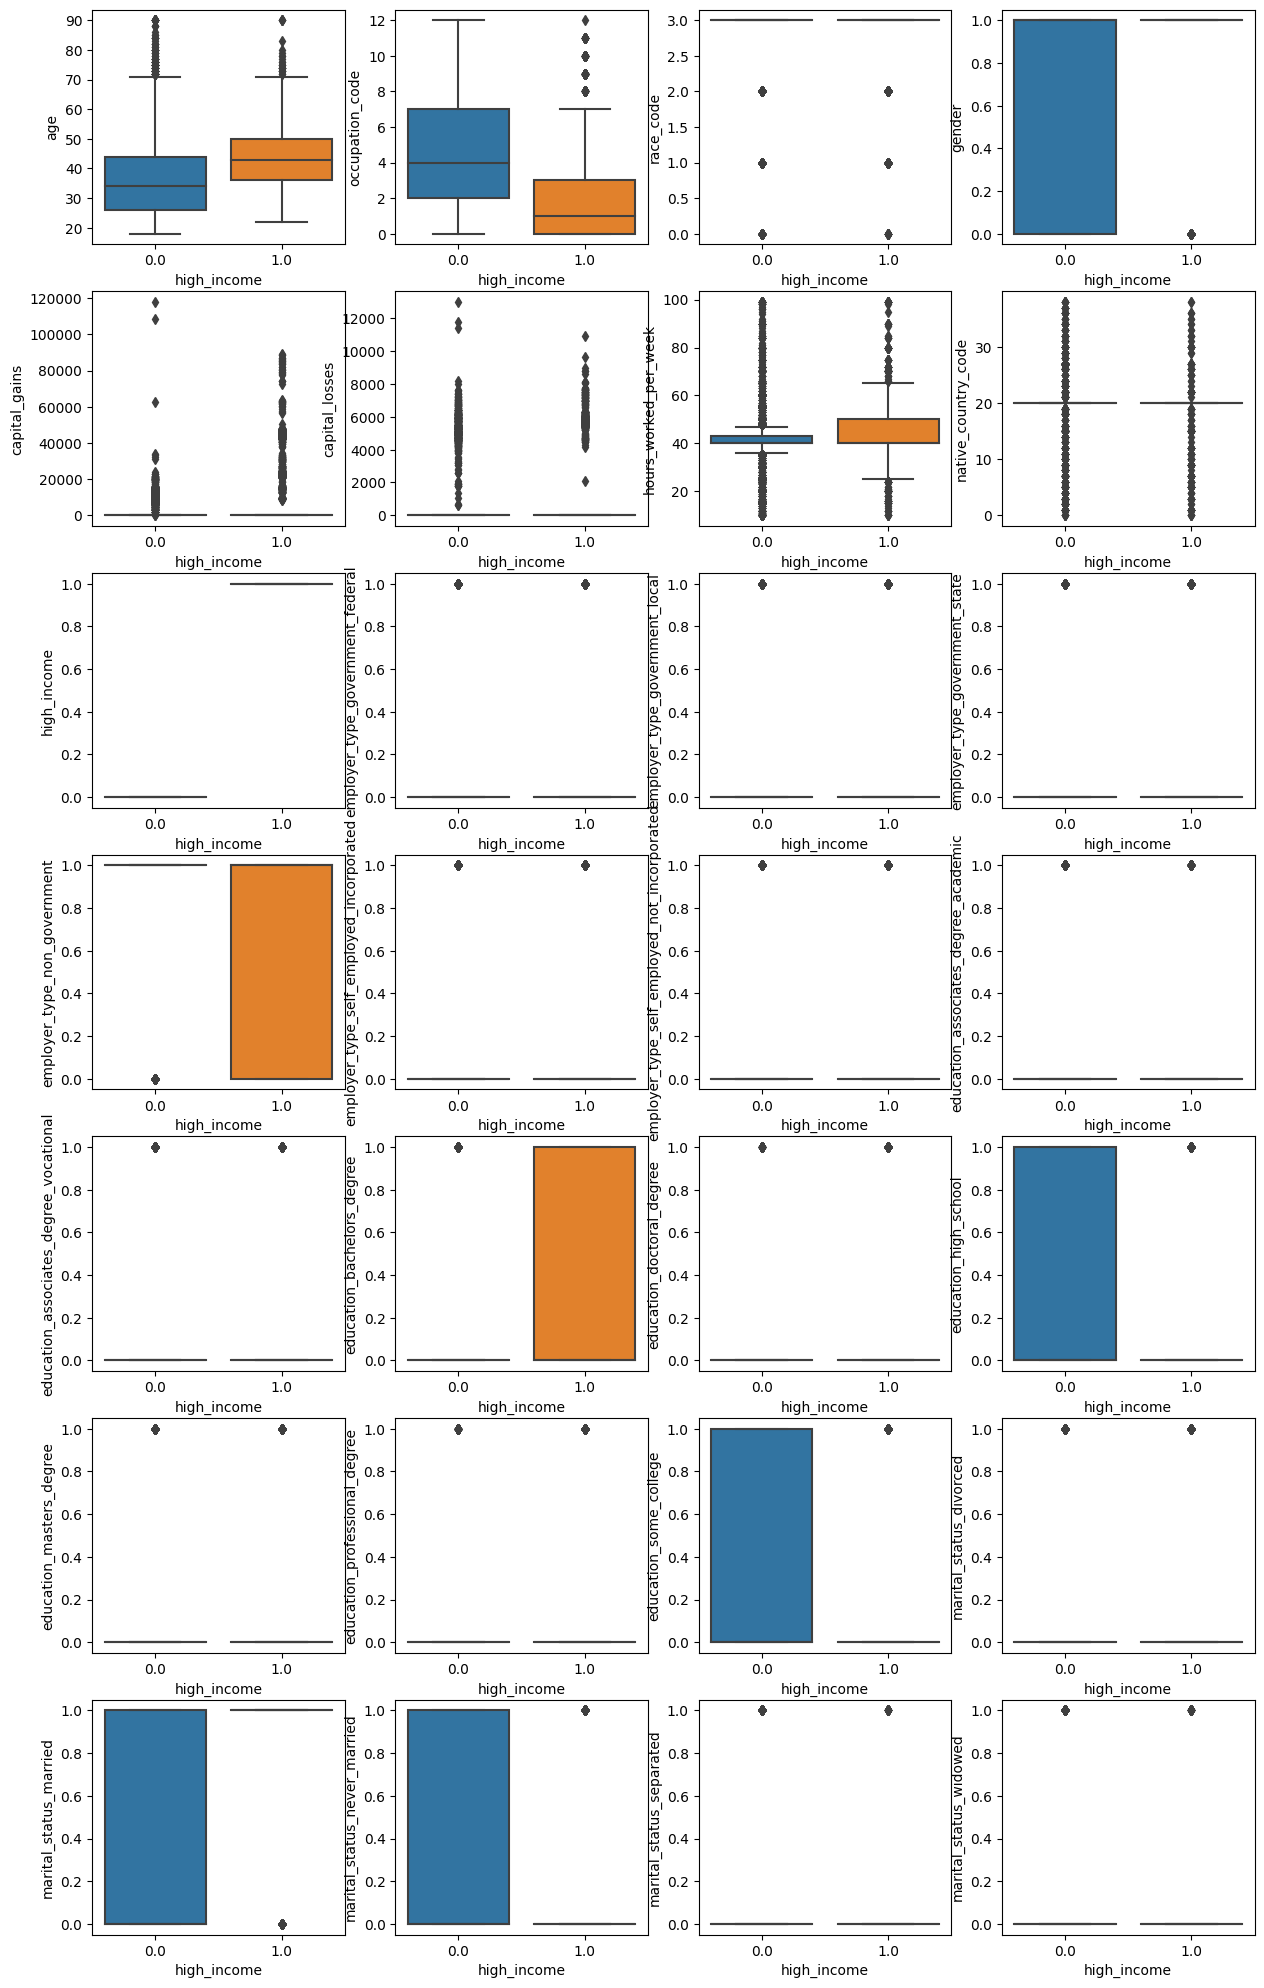

In [8]:
#generate box plots that show 
#how the distribution of each predictor variable differs according to whether a person has high income or not
rows, cols = 7, 4
df_col_index = 0
fig, ax = plt.subplots(rows, cols, figsize=(15,25))
for row in range(rows):
  for col in range(cols):
    sns.boxplot(x='high_income', y=df.columns[df_col_index], data=df, ax=ax[row, col])
    df_col_index += 1

In [9]:
#display a correlation matrix for all of the variables in the dataset
df.corr()

,age,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,high_income,employer_type_government_federal,...,education_doctoral_degree,education_high_school,education_masters_degree,education_professional_degree,education_some_college,marital_status_divorced,marital_status_married,marital_status_never_married,marital_status_separated,marital_status_widowed
age,1.000000,-0.084245,0.021066,0.054982,0.123000,0.064397,0.095540,-0.028672,0.220052,0.061499,...,0.083239,-0.012320,0.113355,0.062625,-0.095458,0.166619,0.284836,-0.512311,0.018257,0.243620
occupation_code,-0.084245,1.000000,-0.012757,0.174763,-0.103452,-0.055396,-0.027577,0.027833,-0.252312,-0.078095,...,-0.107612,0.331785,-0.207071,-0.112322,0.037954,-0.040521,0.008346,0.020014,0.015723,-0.010782
race_code,0.021066,-0.012757,1.000000,0.054918,0.012296,0.017748,0.035862,0.112365,0.020980,-0.057631,...,-0.004024,-0.001770,0.005960,-0.003176,-0.002918,0.013502,0.044025,-0.036715,-0.048959,-0.004525
gender,0.054982,0.174763,0.054918,1.000000,0.038654,0.038256,0.215326,-0.004178,0.120774,-0.005148,...,0.025484,0.013591,-0.001603,0.041497,-0.041864,-0.230744,0.399127,-0.148302,-0.097081,-0.169045
capital_gains,0.123000,-0.103452,0.012296,0.038654,1.000000,-0.047450,0.071945,-0.013714,0.326991,0.011973,...,0.063085,-0.102853,0.086119,0.110978,-0.039676,-0.017757,0.100734,-0.085653,-0.014019,-0.002241
capital_losses,0.064397,-0.055396,0.017748,0.038256,-0.047450,1.000000,0.051700,-0.006429,0.154043,0.013090,...,0.055413,-0.052625,0.049761,0.052540,-0.027488,-0.017930,0.073316,-0.057407,-0.010778,-0.004338
hours_worked_per_week,0.095540,-0.027577,0.035862,0.215326,0.071945,0.051700,1.000000,0.000037,0.178356,0.004107,...,0.071483,-0.041944,0.062142,0.080735,-0.098910,0.016458,0.191458,-0.178865,-0.019823,-0.078316
native_country_code,-0.028672,0.027833,0.112365,-0.004178,-0.013714,-0.006429,0.000037,1.000000,-0.040182,-0.015032,...,-0.038061,0.037547,-0.026052,-0.028553,0.021008,0.001529,-0.026390,0.031757,-0.011250,-0.003751
high_income,0.220052,-0.252312,0.020980,0.120774,0.326991,0.154043,0.178356,-0.040182,1.000000,0.053403,...,0.154272,-0.309473,0.195970,0.154338,-0.044998,-0.110218,0.381771,-0.277029,-0.063315,-0.041176
employer_type_government_federal,0.061499,-0.078095,-0.057631,-0.005148,0.011973,0.013090,0.004107,-0.015032,0.053403,1.000000,...,0.007461,-0.045571,0.009557,0.012029,0.013440,0.022020,0.006093,-0.025573,-0.003189,0.010767


<Axes: >

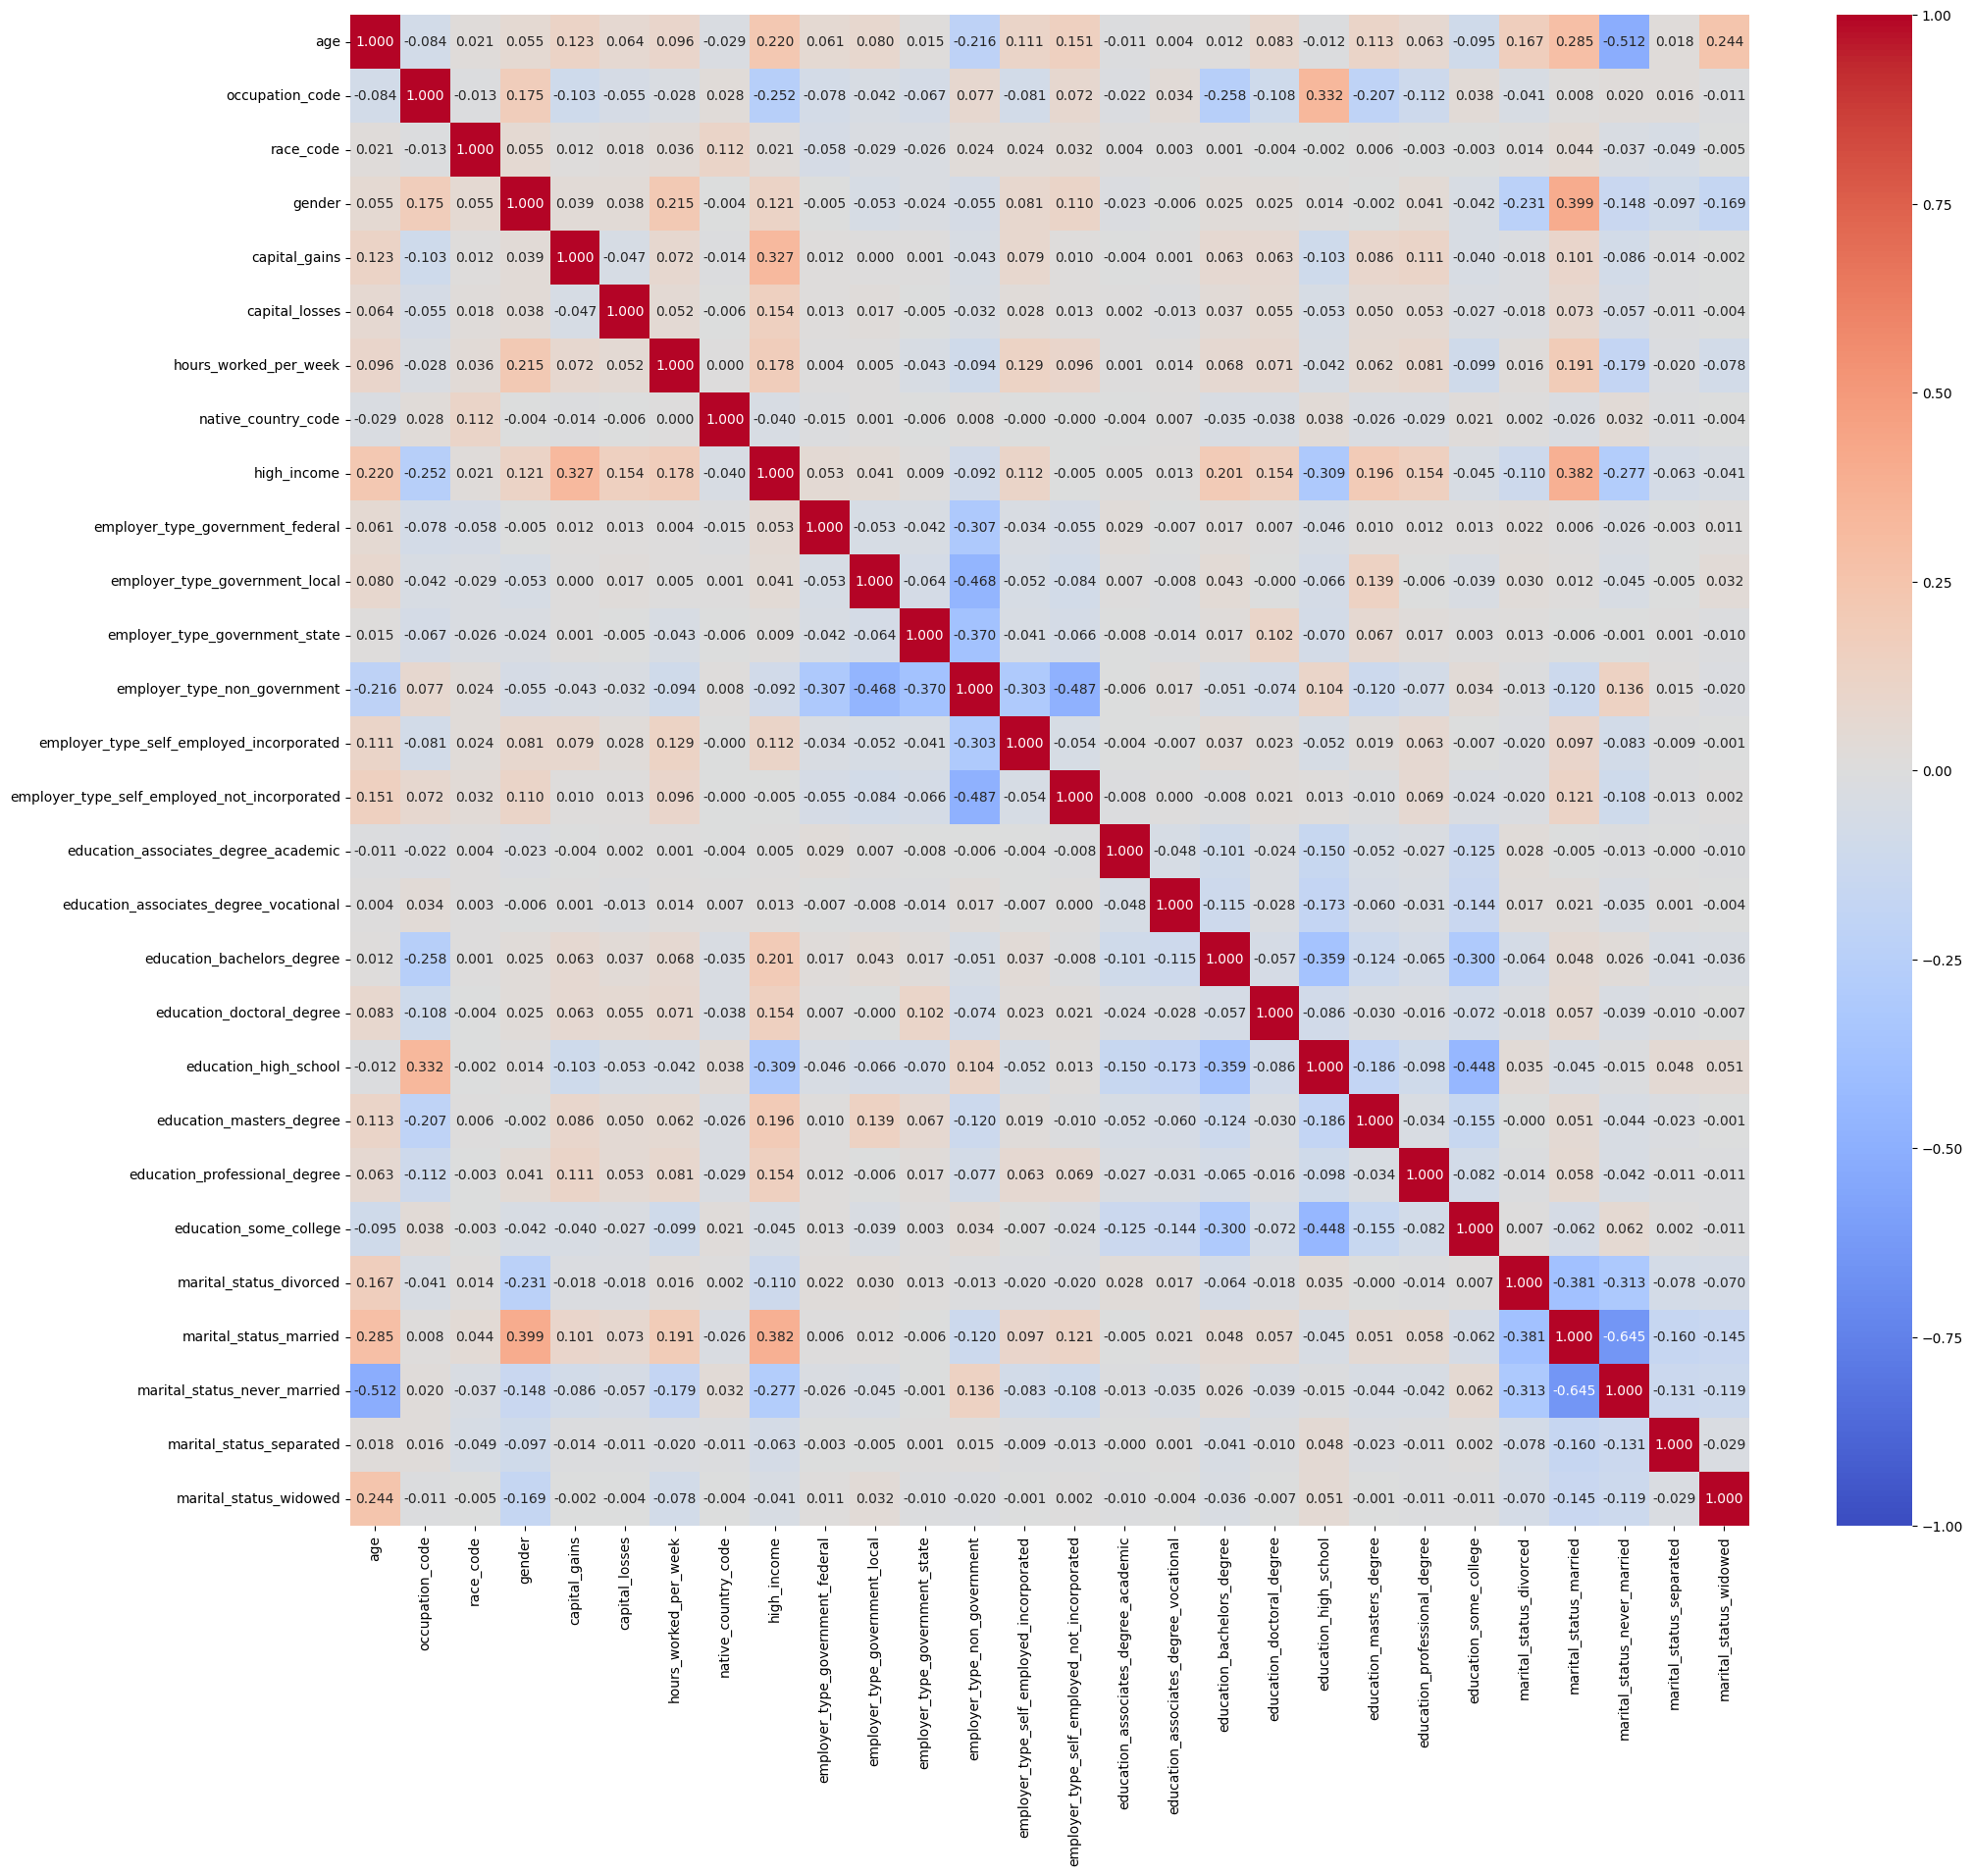

In [10]:
#draw a correlation matrix heatmap
fig, ax = plt.subplots(figsize=(23,20))
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, vmax=1, center=0, cmap='coolwarm', ax=ax)

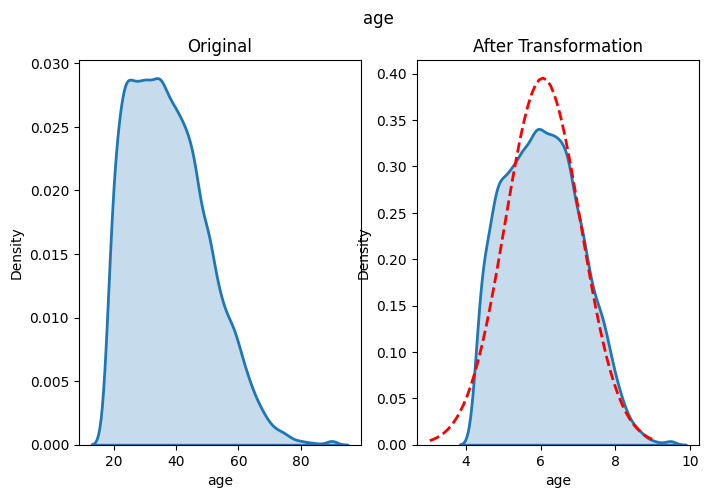

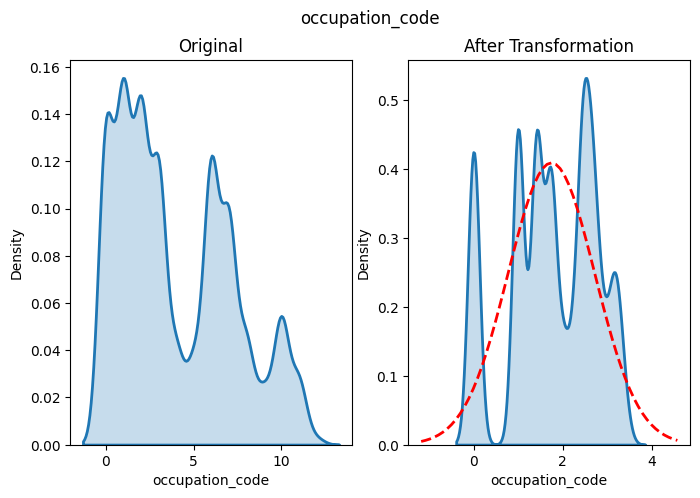

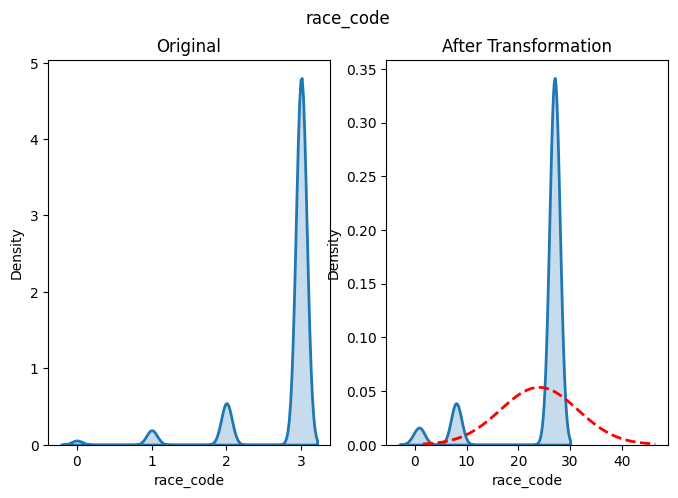

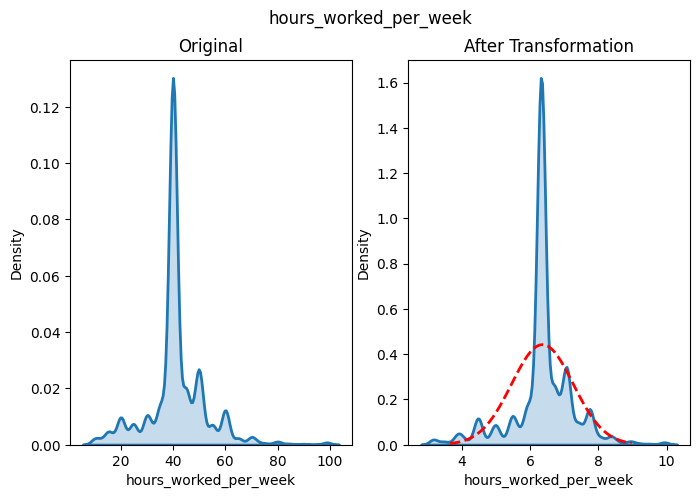

In [11]:

# define the columns to transform and plot
columns = ['age', 'occupation_code', 'race_code', 'hours_worked_per_week']

# loop through the columns and apply transformations and plots
for col in columns:
    # make a copy of the original (untransformed) column
    col_og = df[col].copy()
    
    # apply the transformation to the column
    if col == 'age'or col == 'occupation_code'or col == 'hours_worked_per_week':
        df[col] = [math.sqrt(x) for x in df[col]]
    elif col == 'race_code':
        df[col] = [x**3 for x in df[col]]
    
    # get values for plotting a normal distribution for the transformed variable
    mean, std = df[col].mean(), df[col].std()
    x = np.arange(mean - (3 * std), mean + (3 * std), std / 10)
    
    # plot the untransformed and transformed distributions for the column
    fig, ax = plt.subplots(1, 2, figsize=(8,5))
    sns.kdeplot(col_og, ax=ax[0], fill=True, lw=2)
    sns.lineplot(x=x, y=norm.pdf(x, mean, std), ax=ax[1], lw=2, color='r', linestyle='--')
    sns.kdeplot(df[col], ax=ax[1], fill=True, lw=2)
    ax[0].title.set_text('Original')
    ax[1].title.set_text('After Transformation')
    fig.suptitle(col, fontsize=12)
    plt.show()
    
    # reset the transformed column to the original for the next iteration
    df[col] = col_og

In [12]:
#create a dataframe containing only those rows for which an income prediction needs to be made
#Only 20k rows have the y variable info (high income). Use for testing & training
df_predict = df[pd.isnull(df.high_income) == True].copy()

#remove all incomplete rows(3k out of 23k) from the 'df' dataframe
#use these later for predicting on
df = df[pd.isnull(df.high_income) == False].copy()

In [13]:
##Rescaling Predictor Variables : define a min-max scaler and rescale all predictor variables to the range 0 to 1

# define the columns to apply the MinMaxScaler
predictors = ['age', 'occupation_code', 'race_code', 'gender', 'capital_gains', 'capital_losses', 'hours_worked_per_week', 'native_country_code', 'employer_type_government_federal', 'education_associates_degree_vocational',  'education_associates_degree_academic', 'education_bachelors_degree', 'education_doctoral_degree', 'education_high_school', 'education_masters_degree', 'education_professional_degree', 'education_some_college', 'marital_status_divorced', 'marital_status_married', 'marital_status_never_married', 'marital_status_separated', 'marital_status_widowed']

# apply the MinMaxScaler to the columns
scaler = MinMaxScaler(feature_range=(0, 1))
df[predictors] = scaler.fit_transform(df[predictors])


In [14]:
#show descriptive statistics for all of the rescaled predictor variables.
df[predictors].describe()

,age,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,employer_type_government_federal,education_associates_degree_vocational,...,education_doctoral_degree,education_high_school,education_masters_degree,education_professional_degree,education_some_college,marital_status_divorced,marital_status_married,marital_status_never_married,marital_status_separated,marital_status_widowed
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.274651,0.333479,0.936033,0.641700,0.013793,0.019665,0.351628,0.520563,0.034100,0.052450,...,0.013550,0.351550,0.060200,0.017000,0.271700,0.156950,0.439900,0.345150,0.032200,0.025800
std,0.174990,0.269888,0.175496,0.479513,0.061980,0.091831,0.126973,0.071617,0.181491,0.222938,...,0.115616,0.477466,0.237863,0.129274,0.444847,0.363763,0.496387,0.475429,0.176535,0.158542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.138889,0.083333,1.000000,0.000000,0.000000,0.000000,0.337079,0.526316,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.250000,1.000000,1.000000,0.000000,0.000000,0.337079,0.526316,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.388889,0.500000,1.000000,1.000000,0.000000,0.000000,0.393258,0.526316,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#split into training and testing sets (use k-fold cross validation)

df_train, df_test = train_test_split(df.copy(), train_size=0.7, shuffle=True, random_state=42)

#display the number of rows in the training set
#print(df_train.count())
print(len(df_train))

#display the number of rows in the testing set
print(df_test.count())
print(len(df_test))

14000
age                                             6000
occupation_code                                 6000
race_code                                       6000
gender                                          6000
capital_gains                                   6000
capital_losses                                  6000
hours_worked_per_week                           6000
native_country_code                             6000
high_income                                     6000
employer_type_government_federal                6000
employer_type_government_local                  6000
employer_type_government_state                  6000
employer_type_non_government                    6000
employer_type_self_employed_incorporated        6000
employer_type_self_employed_not_incorporated    6000
education_associates_degree_academic            6000
education_associates_degree_vocational          6000
education_bachelors_degree                      6000
education_doctoral_degree               

In [16]:
##ML Model_1 Logistic Regression
#train a logistic regression classifier
model = LogisticRegression(random_state=42) #defining the model with an algorithm(LR in this case) (random state parameter ensures all students are getting same result with the same initial point)
model.fit(df_train[predictors], df_train.high_income) #training the model. (features, dependent var)

#generate predictions, and save them in a new column named "high_income_predicted" in the testing dataframe
df_test['high_income_predicted'] = model.predict(df_test[predictors])

#view actual and predicted values for the first 20 women in the testing set
df_test[['high_income', 'high_income_predicted']].head(20)


,high_income,high_income_predicted
id,,
10651,0.0,0.0
2042,0.0,0.0
8669,1.0,0.0
1115,0.0,0.0
13903,0.0,0.0
11964,0.0,0.0
11073,0.0,0.0
3003,0.0,0.0
19772,0.0,0.0


In [17]:
##MODEL1 performance
#define a function that prints a confusion matrix and other performance metrics
def print_metrics(actual, predicted):
  tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
  total_predictions = tn + fp + fn + tp
  print(' True positive: {} ({:.2f}%)'.format(tp, tp / total_predictions * 100))
  print(' True negative: {} ({:.2f}%)'.format(tn, tn / total_predictions * 100))
  print('False positive: {} ({:.2f}%)'.format(fp, fp / total_predictions * 100))
  print('False negative: {} ({:.2f}%)\n'.format(fn, fn / total_predictions * 100))
  target_names=['does not have high_income', 'high_income']
  print(classification_report(actual, predicted, target_names=target_names, digits=4))

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.high_income_predicted)

 True positive: 638 (10.63%)
 True negative: 4560 (76.00%)
False positive: 267 (4.45%)
False negative: 535 (8.92%)

                           precision    recall  f1-score   support

does not have high_income     0.8950    0.9447    0.9192      4827
              high_income     0.7050    0.5439    0.6141      1173

                 accuracy                         0.8663      6000
                macro avg     0.8000    0.7443    0.7666      6000
             weighted avg     0.8578    0.8663    0.8595      6000



In [18]:
#ML Model_2 KNN and it's performance

#train a k-nearest neighbors (KNN) classifier
model = KNeighborsClassifier(n_neighbors=10)
model.fit(df_train[predictors], df_train.high_income)

#evaluate the performance of the KNN classifier using the test set
df_test['high_income_predicted'] = model.predict(df_test[predictors])

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.high_income_predicted)

 True positive: 592 (9.87%)
 True negative: 4577 (76.28%)
False positive: 250 (4.17%)
False negative: 581 (9.68%)

                           precision    recall  f1-score   support

does not have high_income     0.8874    0.9482    0.9168      4827
              high_income     0.7031    0.5047    0.5876      1173

                 accuracy                         0.8615      6000
                macro avg     0.7952    0.7264    0.7522      6000
             weighted avg     0.8513    0.8615    0.8524      6000



In [19]:
#ML Model_3 neural network and it's performance + HYPERPARAMETER


#define and train the neural network
model = MLPClassifier(random_state=42, max_iter=300, hidden_layer_sizes=(256, 128, 64, 32, 16), 
                      learning_rate='adaptive', early_stopping=False)
model.fit(df_train[predictors], df_train.high_income)

#evaluate the performance of the neural network using the test set
df_test['high_income_predicted'] = model.predict(df_test[predictors])

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.high_income_predicted)

 True positive: 692 (11.53%)
 True negative: 4438 (73.97%)
False positive: 389 (6.48%)
False negative: 481 (8.02%)

                           precision    recall  f1-score   support

does not have high_income     0.9022    0.9194    0.9107      4827
              high_income     0.6401    0.5899    0.6140      1173

                 accuracy                         0.8550      6000
                macro avg     0.7712    0.7547    0.7624      6000
             weighted avg     0.8510    0.8550    0.8527      6000



In [20]:
#ML Model_4 decision tree and it's performance + HYPERPARAMETER

# define the decision tree classifier
model = DecisionTreeClassifier(random_state=42, max_depth=5)

# train the model using the training set
model.fit(df_train[predictors], df_train.high_income)

# predict the outcomes of the test set 
df_test['high_income_predicted'] = model.predict(df_test[predictors])

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.high_income_predicted)




 True positive: 618 (10.30%)
 True negative: 4575 (76.25%)
False positive: 252 (4.20%)
False negative: 555 (9.25%)

                           precision    recall  f1-score   support

does not have high_income     0.8918    0.9478    0.9190      4827
              high_income     0.7103    0.5269    0.6050      1173

                 accuracy                         0.8655      6000
                macro avg     0.8011    0.7373    0.7620      6000
             weighted avg     0.8563    0.8655    0.8576      6000



In [21]:
#decisionTree HYPERPARAMETER
from sklearn.model_selection import GridSearchCV
# define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# create the grid search cross-validation object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# train the grid search object using the training set
grid_search.fit(df_train[predictors], df_train.high_income)

# predict the outcomes of the test set using the best model found by grid search
df_test['high_income_predicted'] = grid_search.best_estimator_.predict(df_test[predictors])


# evaluate the performance of the model on the test set
print_metrics(df_test.high_income, df_test.high_income_predicted)



 True positive: 602 (10.03%)
 True negative: 4610 (76.83%)
False positive: 217 (3.62%)
False negative: 571 (9.52%)

                           precision    recall  f1-score   support

does not have high_income     0.8898    0.9550    0.9213      4827
              high_income     0.7350    0.5132    0.6044      1173

                 accuracy                         0.8687      6000
                macro avg     0.8124    0.7341    0.7628      6000
             weighted avg     0.8595    0.8687    0.8593      6000



In [22]:
 #select model with highest overall classification accuracy and apply to 3k records(df_predict)
 
 #decisionTree HYPERPARAMETER
from sklearn.model_selection import GridSearchCV
# define the parameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# create the decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# create the grid search cross-validation object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# train the grid search object using the training set
grid_search.fit(df_train[predictors], df_train.high_income)

# predict the outcomes of the test set using the best model found by grid search
df_predict['high_income_predicted'] = grid_search.best_estimator_.predict(df_predict[predictors])

df_predict.high_income_predicted = df_predict.high_income_predicted.astype(int)

Solution = id, df_predict.high_income_predicted 
print(Solution)

#print(count())

(<built-in function id>, id
20001    0
20002    0
20003    0
20004    0
20005    0
        ..
22996    0
22997    0
22998    0
22999    0
23000    0
Name: high_income_predicted, Length: 3000, dtype: int64)


In [23]:

# reset index to convert it to a column
df_predict = df_predict.reset_index()

# save id and salary_greater_than_100k values for each prediction to a CSV file
df_predict.to_csv('Jhobalia, Pooja.csv', columns=['id', 'high_income_predicted'], index=False, header=False)

